## 1. 데이터생성

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, n_features=2, centers=5, random_state=10)

- make_blobs 이용해 랜덤으로 데이터 생성
- n_sample=100은 전체 데이터 개수, n_features = 2는 feature 개수, centers=5는 중심개수(그룹개수), random_state=10은 랜덤 시드값 의미

In [3]:
print(X.shape) # X : 피처데이터의 차원은 2차원, 데이터 100개가 생성
print(y.shape) # y : 타깃데이터의 차원은 1차원, 데이터 100개가 생성

(100, 2)
(100,)


## 2.데이터 차원확인

## 3. 라벨링되지 않은 데이터 플롯

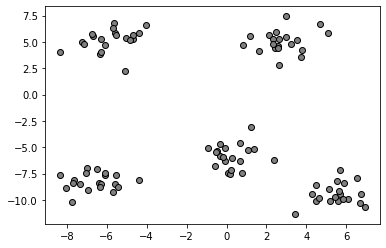

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='gray', edgecolor='black', marker='o')
plt.show()

- 5개의 클러스터(그룹)으로 분리되어 있다고 생각하고, k=5라고 설정

## 4. k-평균 클러스터링

In [15]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=5, init='random', max_iter=100, random_state=0)
kmc.fit(X)
label_kmc = kmc.labels_

print(label_kmc)

[2 4 3 1 0 2 2 3 0 2 3 2 0 1 0 2 4 1 0 2 2 1 4 3 2 2 1 0 3 4 1 1 0 1 2 0 3
 1 3 4 1 1 1 0 3 3 2 0 4 0 4 0 2 3 0 0 1 4 1 3 0 4 4 1 2 4 0 4 0 3 3 2 4 0
 1 1 3 4 2 2 0 0 4 1 4 3 1 3 1 3 4 3 2 4 4 4 3 2 2 3]


- kmeans함수이용 , n_clusters=5는 집단의 수(k값), init 옵션은 첫번째 평균값 어떻게 정할지에 대한 방법, max_iter=100은 알고리즘 최대 반복횟수, random_state는 랜덤 시드값
- label_kmc는 모형을 어떻게 클러스터링 했는지 확인가능

## 5. 시각화를 위한 데이터프레임 생성

In [22]:
import pandas as pd
kmc_columns = ['kmc_comp1','kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(100)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,2
1,1.627832,4.178069,1,4
2,-6.950884,-9.024594,4,3
3,-0.952769,-5.034316,2,1
4,6.550104,-7.912339,0,0
...,...,...,...,...
95,3.719148,3.557522,1,4
96,-7.697481,-8.356274,4,3
97,-6.745814,5.757279,3,2
98,-5.096242,2.231017,3,2


In [19]:
print(set(X_kmc_df['target']))
print(set(X_kmc_df['label_kmc']))

{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4}


타깃데이터와 군집이름이 0,1,2,3,4로 5개로 구분됨을 확인(target = 0,1,2,3,4)

## 6. k-평균 클러스터링을 이용한 데이터 플롯

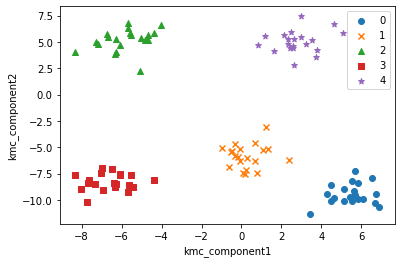

In [20]:
df = X_kmc_df
markers = ['o', 'x', '^', 's', '*'] #marker의 종류 표현

for i, mark in enumerate(markers) :
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1,X2, marker=mark, label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

## 7. 모형평가

In [25]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_kmc)
print(sil_score)

0.7598181300128782


- 실루엣 스코어 함수 : 0.76 (k-평균 클러스터링을 통해 만들어진 모형 평가)
- 실루엣 계수(-1<x<1) : 1로 가까워 질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울 수록 근처의 군집과 가까워 진다는 것이다.
- 효율적으로 잘 분리 됐다는 것은 다른 군집과의 거리는 떨어져 있고 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다는 의미이다.